In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
plt.style.use("fivethirtyeight")
%matplotlib inline

# Load Data 

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data Understanding 

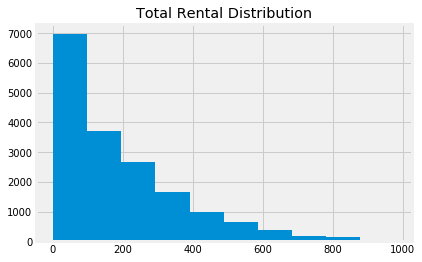

In [3]:
plt.hist(bike_rentals["cnt"]);
plt.title("Total Rental Distribution");

## Checking Correlation 

In [4]:
corr = bike_rentals.corr()
corr["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

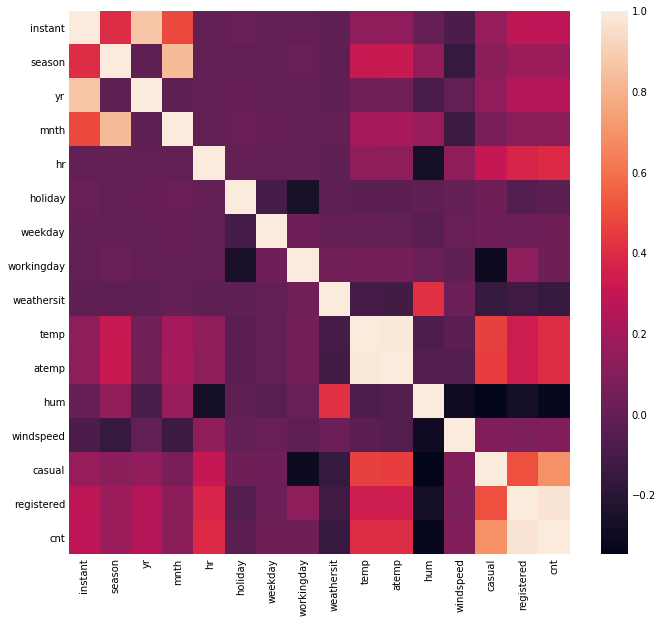

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

# Data Preprocessing

## Binning hr 

In [6]:
def assign_label(num):
    if num >= 6 & num <12:
        return 1
    elif num >=12 & num < 18:
        return 2
    elif num >=18 & num < 24:
        return 3
    elif num > 0 & num < 6:
        return 4

In [7]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


## Splitting Data 

### Trying Manual Sampling 

In [8]:
train = bike_rentals.sample(frac=0.8,replace=False,random_state=1)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [9]:
predictor_cols = train.drop(["cnt","casual","dteday","registered"],axis=1).columns

# Training Model 

In [10]:
X = train[predictor_cols]
y = train["cnt"]
X_test = test[predictor_cols]
y_test = test["cnt"]

## Using Linear Regression 

In [11]:
lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)

## Evaluating Linear Regression Model 

In [12]:
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MAE: 104.63808594054554
MSE: 19580.734550455003
RMSE: 139.93117790705188


## Using Decision Tree Regressor 

In [13]:

leafs = [i for i in range(5,50,5)]

for i in leafs:
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X,y)
    predictions = dt_reg.predict(X_test)
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test,predictions)
    rmse = np.sqrt(mse)
    print("MAE-{}: {}".format(i,mae))
    print("MSE-{}: {}".format(i,mse))
    print("RMSE-{}: {}".format(i,rmse))
    print("============================")



MAE-5: 31.007558405026764
MSE-5: 2738.967385449438
RMSE-5: 52.33514484024514
MAE-10: 31.816845272044624
MSE-10: 2702.8860734612263
RMSE-10: 51.98928806457371
MAE-15: 32.6286437297836
MSE-15: 2873.785089624558
RMSE-15: 53.60769617904278
MAE-20: 33.66576506950119
MSE-20: 3155.6270959534563
RMSE-20: 56.174968588807026
MAE-25: 34.30073013948014
MSE-25: 3218.8574008664928
RMSE-25: 56.73497511118246
MAE-30: 35.3273507272153
MSE-30: 3334.080323141879
RMSE-30: 57.74149567808128
MAE-35: 36.38181117407762
MSE-35: 3523.345586659537
RMSE-35: 59.35777612629652
MAE-40: 37.624470120266444
MSE-40: 3705.6323289206352
RMSE-40: 60.87390515582712
MAE-45: 38.608862633554494
MSE-45: 3911.8356861088964
RMSE-45: 62.544669525938794


## Using Random Forest Regressor 

In [14]:
leafs = [i for i in range(5,50,5)]

for i in leafs:
    rf_reg = RandomForestRegressor(min_samples_leaf=i)
    rf_reg.fit(X,y)
    predictions = rf_reg.predict(X_test)
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test,predictions)
    rmse = np.sqrt(mse)
    print("MAE-{}: {}".format(i,mae))
    print("MSE-{}: {}".format(i,mse))
    print("RMSE-{}: {}".format(i,rmse))
    print("============================")

MAE-5: 26.738690174209765
MSE-5: 2024.429925056033
RMSE-5: 44.99366538809694
MAE-10: 28.851805785632294
MSE-10: 2326.96588274674
RMSE-10: 48.238634752102385
MAE-15: 30.662253835299385
MSE-15: 2607.468717749305
RMSE-15: 51.06337941959291
MAE-20: 32.16686097320096
MSE-20: 2807.310564773418
RMSE-20: 52.98405953466965
MAE-25: 33.66126119532844
MSE-25: 2993.793575672461
RMSE-25: 54.715569773808085
MAE-30: 34.892445499345364
MSE-30: 3190.7627881751114
RMSE-30: 56.486837300163224
MAE-35: 36.39314983263326
MSE-35: 3413.5959598189047
RMSE-35: 58.425987024772674
MAE-40: 37.194601283660596
MSE-40: 3561.5938475336
RMSE-40: 59.679090538760725
MAE-45: 38.589935216931366
MSE-45: 3750.493686531241
RMSE-45: 61.241274370568426
